In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"data_Southwark_08-18.csv")

In [4]:
data.head(5)

,Date,Total
0,200801,3459
1,200802,3325
2,200803,3323
3,200804,3343
4,200805,3557


In [5]:
import datetime
data["Date"]=pd.to_datetime(data["Date"] ,format="%Y%m")

In [6]:
data

,Date,Total
0,2008-01-01,3459
1,2008-02-01,3325
2,2008-03-01,3323
3,2008-04-01,3343
4,2008-05-01,3557
...,...,...
127,2018-08-01,3063
128,2018-09-01,2959
129,2018-10-01,3223
130,2018-11-01,3143


In [7]:
df=data.reset_index()["Total"]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df).reshape(-1,1))

In [9]:
train_data=int(len(df1)*0.50)
test_data=len(df1)-train_data
train_data=df1[:-test_data]
test_data=df1[-test_data:]

In [10]:
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [11]:
time_step=50
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [12]:
print(x_train)

[[0.81143635 0.72021784 0.71885636 0.73247107 0.8781484  1.
  0.96868618 0.86929884 0.69366916 0.80599047 0.58543227 0.30088496
  0.4737917  0.31109598 0.59632403 0.50987066 0.67392784 0.70456093
  0.65486726 0.67665078 0.54118448 0.63104152 0.45132743 0.28454731
  0.38529612 0.390742   0.7910143  0.58951668 0.63104152 0.65214432
  0.76446562 0.6943499  0.52961198 0.63716814 0.44860449 0.1218516
  0.45881552 0.24982982 0.40095303 0.43430905 0.60857726 0.50238257
  0.43771273 0.43430905 0.30769231 0.57726344 0.43158611 0.36147039
  0.27433628 0.22600408]
 [0.72021784 0.71885636 0.73247107 0.8781484  1.         0.96868618
  0.86929884 0.69366916 0.80599047 0.58543227 0.30088496 0.4737917
  0.31109598 0.59632403 0.50987066 0.67392784 0.70456093 0.65486726
  0.67665078 0.54118448 0.63104152 0.45132743 0.28454731 0.38529612
  0.390742   0.7910143  0.58951668 0.63104152 0.65214432 0.76446562
  0.6943499  0.52961198 0.63716814 0.44860449 0.1218516  0.45881552
  0.24982982 0.40095303 0.4343090

In [13]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [16]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs=50
batch_size=64
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size,verbose=1)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.1120 - accuracy: 0.0000e+00 - val_loss: 0.1984 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 96ms/step - loss: 0.0761 - accuracy: 0.0000e+00 - val_loss: 0.1520 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 94ms/step - loss: 0.0469 - accuracy: 0.0000e+00 - val_loss: 0.1070 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 83ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - val_loss: 0.0648 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 78ms/step - loss: 0.0122 - accuracy: 0.0000e+00 - val_loss: 0.0341 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 84ms/step - loss: 0.0215 - accuracy: 0.0000e+00 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 79ms/step - loss: 0.0281 - accuracy: 0.0000e+00 - val_loss: 0.0315 

In [19]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.11092803782676884

In [21]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.23078157763352636

In [22]:
len(test_data)

66

In [23]:
x_input=test_data[16:].reshape(1,-1)
x_input.shape

(1, 50)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [25]:
len(temp_input)

50

In [26]:
#predicting for next 30 days
import array
lst_output=[]
n_steps=50
i=0
while(i<30):
    if(len(temp_input)>50):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.32371593]
51
1 day input [0.08304969 0.18652144 0.03539823 0.16473792 0.14159292 0.40639891
 0.2940776  0.27910143 0.23825732 0.11572498 0.25119129 0.36147039
 0.25255276 0.19469027 0.14567733 0.19945541 0.26072158 0.50850919
 0.3287951  0.35670524 0.35874745 0.39754935 0.35874745 0.22123894
 0.27569775 0.32198775 0.18311777 0.38529612 0.22736555 0.36010892
 0.39346494 0.51123213 0.52144316 0.4506467  0.48400272 0.60993873
 0.26208305 0.38938053 0.18243703 0.32198775 0.46017699 0.51123213
 0.47787611 0.72498298 0.54186521 0.47106875 0.65078285 0.59632403
 0.43022464 0.32371593]
1 day output [[0.3278944]]
2 day input [0.18652144 0.03539823 0.16473792 0.14159292 0.40639891 0.2940776
 0.27910143 0.23825732 0.11572498 0.25119129 0.36147039 0.25255276
 0.19469027 0.14567733 0.19945541 0.26072158 0.50850919 0.3287951
 0.35670524 0.35874745 0.39754935 0.35874745 0.22123894 0.27569775
 0.32198775 0.18311777 0.38529612 0.22736555 0.36010892 0.39346494
 0.51123213 0.52144316 0.4506467  0.4840

18 day output [[0.2773493]]
19 day input [0.3287951  0.35670524 0.35874745 0.39754935 0.35874745 0.22123894
 0.27569775 0.32198775 0.18311777 0.38529612 0.22736555 0.36010892
 0.39346494 0.51123213 0.52144316 0.4506467  0.48400272 0.60993873
 0.26208305 0.38938053 0.18243703 0.32198775 0.46017699 0.51123213
 0.47787611 0.72498298 0.54186521 0.47106875 0.65078285 0.59632403
 0.43022464 0.32371593 0.32789439 0.33051729 0.33150291 0.33097148
 0.3291496  0.32630599 0.32270813 0.3185991  0.31418365 0.30962628
 0.30505234 0.30055344 0.29619241 0.29200989 0.28802836 0.28425801
 0.28069979 0.27734929]
19 day output [[0.27419835]]
20 day input [0.35670524 0.35874745 0.39754935 0.35874745 0.22123894 0.27569775
 0.32198775 0.18311777 0.38529612 0.22736555 0.36010892 0.39346494
 0.51123213 0.52144316 0.4506467  0.48400272 0.60993873 0.26208305
 0.38938053 0.18243703 0.32198775 0.46017699 0.51123213 0.47787611
 0.72498298 0.54186521 0.47106875 0.65078285 0.59632403 0.43022464
 0.32371593 0.32789439

In [28]:
day_new = np.arange(1,51)
day_pred = np.arange(51,81)

In [29]:
df2=df1.tolist()
df2.extend(lst_output)

In [30]:
len(df1)

132

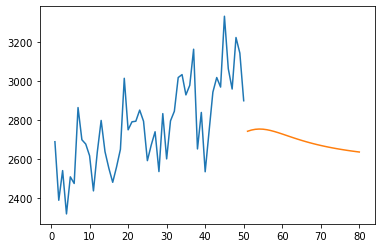

In [31]:
plt.plot(day_new,scale.inverse_transform(df1[82:]))
plt.plot(day_pred,scale.inverse_transform(lst_output))